**Создание модели для фильтрации спам сообщений**

Кейс: заказчик поставил перед нами задачу создать модель которая с максимальной точностью будет определять спам письма. Для этих целей он предоставил текстовый файл в котором указаны типичные сообщения с указанием типа: ham и spam - важные сообщения и спам соответственно.

# Загрузка и обработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [3]:
doc = pd.read_table('SMSSpamCollection.txt', header=None, names=['sms_type', 'sms'])

In [4]:
doc.head()

,sms_type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
doc.shape

(5572, 2)

In [7]:
ham_spam = doc.sms_type.value_counts()

In [8]:
ham_spam

,count
sms_type,
ham,4825
spam,747


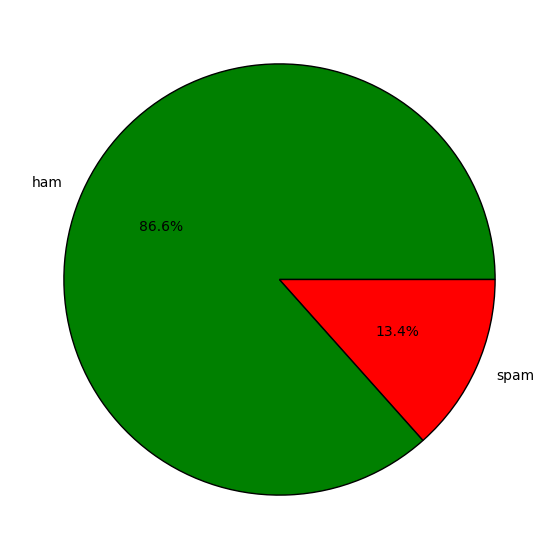

In [23]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

plt.pie(ham_spam.values, labels=ham_spam.index, autopct = '%1.1f%%', colors=['green', 'red'],
         wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})
plt.show()

Определим процент спам писем

In [9]:
print(f"spam rate: {round((ham_spam.iloc[1]/float(ham_spam.iloc[0] + ham_spam.iloc[1]))*100,2)}%")

spam rate: 13.41%


Для категориального переменного sms_type создаем численные представления 0 для ham и 1 для spam

In [10]:
doc['sms_type'] = doc.sms_type.map({'ham':0, 'spam':1})
# также можно использовать doc.replace({'col_name' : value}) в данном случае не указанные значения останутся в исходном виде

In [11]:
doc.head()

,sms_type,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Создание модели

In [12]:
X = doc.sms
y = doc.sms_type

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, shuffle=True, test_size=0.25)

Так как модели предстоит работа с текстом, создаем CountVectorizer, который будет подчитывать содержание слов в тексте. Нам не следует подчитывать такое слово, как english, так как она не помогает в определении типа сообщения.

In [25]:
vect = CountVectorizer(stop_words='english')

In [26]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [27]:
vect.vocabulary_

{'yup': 7254,
 'bathe': 1179,
 'liao': 3873,
 'wait': 6918,
 'msg': 4358,
 'lt': 4021,
 'gt': 3092,
 'min': 4237,
 'den': 2146,
 'weekdays': 6998,
 'got': 3036,
 'special': 5995,
 'price': 5084,
 'haiz': 3135,
 'eat': 2405,
 'cut': 2036,
 'nails': 4415,
 'oso': 4694,
 'muz': 4397,
 'finish': 2711,
 'drivin': 2348,
 'wat': 6962,
 'lunch': 4032,
 'yes': 7218,
 'obviously': 4596,
 'eggs': 2431,
 'pert': 4852,
 'potato': 5014,
 'head': 3197,
 'speak': 5993,
 'soon': 5952,
 'mum': 4380,
 'repent': 5389,
 'happened': 3158,
 'cruise': 1998,
 'thing': 6447,
 'im': 3427,
 'gonna': 3019,
 'miss': 4260,
 'strike': 6147,
 'red': 5323,
 'bird': 1282,
 'antelope': 934,
 'begin': 1227,
 'toplay': 6562,
 'fieldof': 2683,
 'selfindependence': 5663,
 'believe': 1233,
 'flower': 2754,
 'contention': 1900,
 'grow': 3083,
 'random': 5245,
 'sea': 5633,
 'lays': 3827,
 'rock': 5480,
 'envelope': 2494,
 'paper': 4758,
 'words': 7124,
 'wah': 6913,
 'lucky': 4027,
 'man': 4102,
 'save': 5589,
 'money': 4316,


In [28]:
X_train_trans = vect.transform(X_train)
X_test_trans = vect.transform(X_test)

In [29]:
type(X_test_trans)

scipy.sparse._csr.csr_matrix

In [30]:
print(X_test_trans)

  (0, 4102)	1
  (0, 4909)	1
  (1, 2310)	1
  (1, 4092)	1
  (1, 4570)	1
  (1, 5456)	1
  (1, 5491)	1
  (1, 6251)	1
  (1, 6941)	1
  (2, 3009)	1
  (2, 4184)	1
  (2, 6526)	1
  (3, 2198)	1
  (3, 2303)	1
  (3, 3809)	1
  (3, 5549)	1
  (3, 5876)	1
  (3, 6987)	1
  (4, 3746)	1
  (4, 6123)	1
  (5, 2209)	1
  (5, 2698)	1
  (5, 4623)	1
  (5, 6793)	1
  (5, 6855)	1
  :	:
  (1390, 5395)	1
  (1390, 5673)	1
  (1390, 6665)	1
  (1390, 6849)	1
  (1390, 7125)	1
  (1390, 7186)	1
  (1391, 284)	1
  (1391, 1119)	1
  (1391, 1660)	1
  (1391, 1820)	1
  (1391, 3249)	1
  (1391, 3295)	1
  (1391, 3427)	1
  (1391, 3643)	1
  (1391, 3968)	1
  (1391, 6123)	1
  (1391, 6404)	2
  (1391, 6872)	1
  (1391, 6941)	1
  (1392, 2073)	1
  (1392, 3362)	1
  (1392, 3890)	1
  (1392, 4172)	1
  (1392, 5185)	1
  (1392, 5610)	1


Создаем **наивный байесовский классификатор**.

Многочленный наивный байесовский классификатор подходит для классификации по дискретным признакам (например, для подсчета слов в тексте). Для многочленного распределения обычно требуется целочисленный подсчет признаков. Однако на практике также могут работать дробные подсчеты, такие как tf-idf.

In [31]:
clf = MultinomialNB()

In [32]:
clf.fit(X_train_trans, y_train)

MultinomialNB()

In [33]:
y_pred_sms_type = clf.predict(X_test_trans)
y_pred_proba = clf.predict_proba(X_test_trans)

In [34]:
accuracy_score(y_test, y_pred_sms_type)

0.9842067480258435

Точность составляет ~98 %

In [35]:
confusion_matrix(y_test, y_pred_sms_type)

array([[1191,   10],
       [  12,  180]])

Посмотрим матрицу ошибок, чтобы понять ошибки какого рода преобладают. Как известо различают ошибки **1 рода**, когда модель положительное событие классифицирует как отрицательное, и **2 рода**, когда отрицательное событие классифицируется как положительное.

In [36]:
conf = confusion_matrix(y_test, y_pred_sms_type)
TP = conf[0,0]
FN = conf[0,1]
TN = conf[1,0]
FP = conf[1,1]

In [37]:
Precision = TP / (TP+FP)
print(Precision)

0.8687089715536105


In [38]:
Recall = TP / (TP+FN)
print(Recall)

0.9916736053288926


Нам необходимо максимизировать Recall(т.е сообщения, которые классифисируются как спам, хотя на самом деле являются письмом,несущий полезную информацию). Отправка 'хороших' писем в спам крайне не желательно.



In [39]:
F1_score = 2*(Precision*Recall) / (Precision+Recall)
print(F1_score)

0.9261275272161741


In [41]:
FP_rate, TP_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(FP_rate, TP_rate)

In [42]:
roc_auc

0.9941932070496808

Построим **кривую ROC**(receiver operating characteristic, кст данный термин использовался военными, как мера оценки правильной работы радио), чтобы визуально посмотреть оценить качество бинарной классификации. Площадь под ROC кривой называется AUC, эта мера тоже используется для оценки качества модели. По графику видно, что модель близка к идеальному.

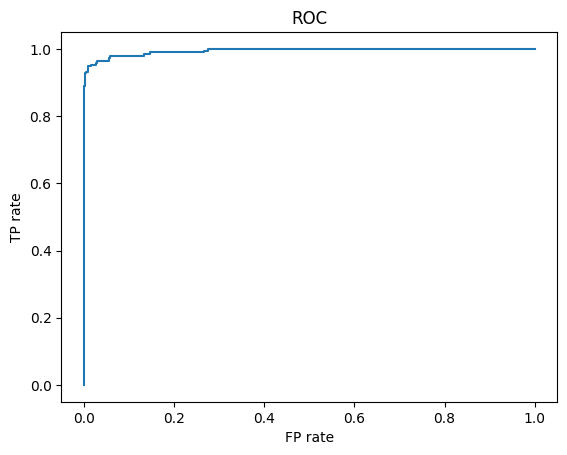

In [43]:
plt.plot(FP_rate, TP_rate)
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.title('ROC')

plt.show()

В заключение проверим нашу модель на случайных наборах текста вручную, чтоб удостовериться в правильной работе классификатора.

In [44]:
data1 = ['You are lottery winner. Click here...']
data1_trans = vect.transform(data1)
clf.predict(data1_trans)

array([1])

In [45]:
data2 = ['Don\'t forget to turn off the kettle']
data2_trans = vect.transform(data2)
clf.predict(data2_trans)

array([0])